## Flight Price Prediction
This project is about using a machine learning model to predict flight prices, given a dataset of flight data.

### Data Dictionary

#### Variable	Description

Airline	- The name of the airline

source -	The date of the journey

Destination -	The destination where the service ends.

Route -The route taken by the flight to reach the destination.

Dep_Time -	The time when the journey starts from the source

Arrival_Time -	Time of arrival at the destination.

Duration -	Total duration of the flight.

Total_Stops -	Total stops between the source and destination.

Additional_Info -	Additional information about the flight

Price -	Target, The price of the ticket()

#### Train.csv

It contains the training data with flight details as described in the above section

#### Test.csv

It has flight details for prediction of the flight price

### Importing libraries
The libraries required are pandas for dataframes, matplotlib for plotting, sklearn.preprocessing for Label Encoding, numpy for arrays, seaborn for pair plots, and sklearn.model_selection for splitting data into test and train data.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

### Reading the datafile

In [62]:
df_train=pd.read_csv("D:/greyatom/Test/file/train.csv")

### Analyzing the datafile

In [63]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [64]:
df_train.shape

(8012, 11)

### Converting duration from hours min format to min format

In [65]:
import datetime
df_train['Duration _in_min']=(pd.to_timedelta(df_train.Duration.str.replace('mins', 'min')).dt.total_seconds()//60).astype(int)

df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration _in_min
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480,765
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016,185
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879,925
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,735
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663,330


### Dropping the column for Duration in hr minutes format

In [66]:
df_train_new= df_train.drop(["Duration"],1)

In [67]:
df_train_new['Date_of_Journey'].replace('\n', '')

0       12/06/2019
1       18/06/2019
2       18/05/2019
3        6/05/2019
4        9/05/2019
           ...    
8007    12/06/2019
8008     9/06/2019
8009     3/03/2019
8010    18/05/2019
8011     9/05/2019
Name: Date_of_Journey, Length: 8012, dtype: object

In [68]:
df_train_new.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'Duration _in_min'],
      dtype='object')

### Finding the columns with null values

In [69]:
df_train_new.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Total_Stops         1
Additional_Info     0
Price               0
Duration _in_min    0
dtype: int64

There are two columns with 1 null value in each.

In [70]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           8012 non-null   object
 1   Date_of_Journey   8012 non-null   object
 2   Source            8012 non-null   object
 3   Destination       8012 non-null   object
 4   Route             8011 non-null   object
 5   Dep_Time          8012 non-null   object
 6   Arrival_Time      8012 non-null   object
 7   Total_Stops       8011 non-null   object
 8   Additional_Info   8012 non-null   object
 9   Price             8012 non-null   int64 
 10  Duration _in_min  8012 non-null   int32 
dtypes: int32(1), int64(1), object(9)
memory usage: 657.4+ KB


In [71]:
df_train_new.Price.value_counts()

10262    197
10844    168
7229     126
4804     110
4823      96
        ... 
10366      1
12648      1
6481       1
6477       1
4098       1
Name: Price, Length: 1632, dtype: int64

In [72]:
df_train_new['Airline'].unique()

array(['Airline C', 'Airline A', 'Airline E', 'Airline G', 'Airline B',
       'Airline D', 'Airline F', 'Airline I', 'Airline H', 'Airline J',
       'Airline K', 'Airline L'], dtype=object)

### Finding missing values from a bargraph

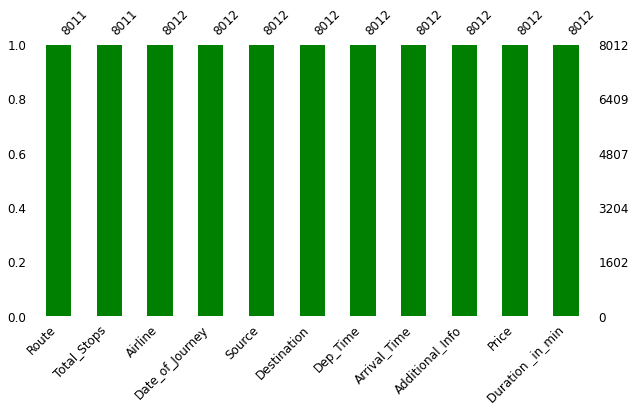

In [73]:
import missingno as mn
mn.bar(df_train_new, color="green", sort="ascending", figsize=(10,5), fontsize=12)

### Bivariate Analysis
### Finding distribution of price against duration in minutes

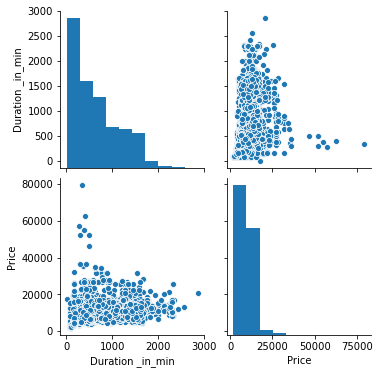

In [74]:
sns.pairplot(df_train_new,vars = ['Duration _in_min', 'Price']);

Surprisingly, the price is not linearly correlated with the duration. This means, there is some other factor which is determining the price. It may be the day of the week.

### Converting date to day of the week
The price would differ based on whether it is weekend, or a weekday for the same route and duration. Therefore, it is important to find out the day of the week for each flight date.

In [75]:
# Converting all dates to standard format
df_train_new['Day_of_Week'] = pd.to_datetime(df_train_new['Date_of_Journey'], format='%d/%m/%Y')

#Identifying the day of the week
df_train_new['Day_of_Week'] = df_train_new['Day_of_Week'].dt.day_name()

### Dropping Additional Info column

The Additional Info column does not hold much information important to the price. So, it would be better to drop the column. Else, it would unnecessarily skew the data.

In [76]:
#df_train_new = df_train_new.drop(["Additional_Info"],1)

###  Pie diagram

In [77]:
p_label=df_train_new['Airline'].unique()

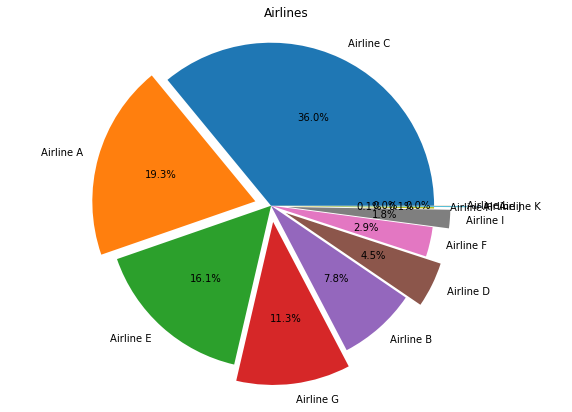

In [78]:
fig = plt.figure(figsize =(10, 7)) 
explode=(0.0, 0.1, 0.0, 0.1,0.0,0.1,0.0,0.1,0.0,0.2,0.3
         ,0.1)
plt.pie(df_train_new.Airline.value_counts(),explode=explode,labels=p_label,autopct='%1.1f%%') 
  
plt.title('Airlines')
plt.axis('equal')
plt.show() 

This shows that airline C has the most number of flights and airline K has the least number of flights.

## Converting categorical values to numerical values using Label Encoder

In [79]:
cat_feature = df_train_new.select_dtypes(include = "object").columns

In [80]:
cat_feature

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Additional_Info',
       'Day_of_Week'],
      dtype='object')

In [81]:
#Label Encoding 'for object' to numeric conversion

LE_var = LabelEncoder()

for col in cat_feature:
    #df_train[col] = LE_var.fit(df_train[col].astype(str))
    df_train_new[col] = LE_var.fit_transform(df_train_new[col].astype(str))
print (df_train_new.info())


    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           8012 non-null   int32
 1   Date_of_Journey   8012 non-null   int32
 2   Source            8012 non-null   int32
 3   Destination       8012 non-null   int32
 4   Route             8012 non-null   int32
 5   Dep_Time          8012 non-null   int32
 6   Arrival_Time      8012 non-null   int32
 7   Total_Stops       8012 non-null   int32
 8   Additional_Info   8012 non-null   int32
 9   Price             8012 non-null   int64
 10  Duration _in_min  8012 non-null   int32
 11  Day_of_Week       8012 non-null   int32
dtypes: int32(11), int64(1)
memory usage: 407.0 KB
None


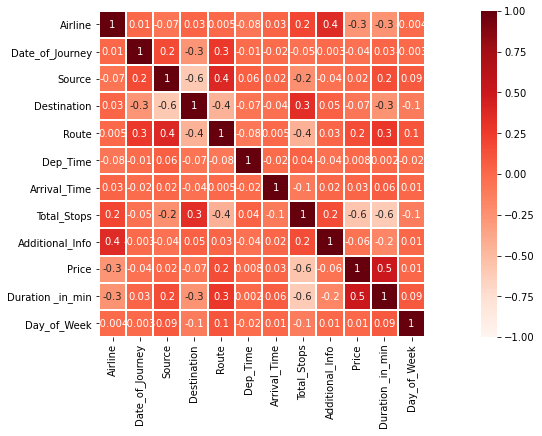

In [82]:
plt.figure(figsize = (20,6))
sns.heatmap(df_train_new.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0,cmap= 'Reds',linewidths=1,linecolor='white',square=True)
            

## Data preprocessing on 'Test Data'

In [83]:
df_test=pd.read_csv("D:/greyatom/Test/file/test.csv")

In [84]:
df_test['Date_of_Journey']

0       27-03-2019
1       27-05-2019
2       06-06-2019
3       06-03-2019
4       15-06-2019
           ...    
2666    21-03-2019
2667    27-04-2019
2668    09-06-2019
2669    01-05-2019
2670    09-06-2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [85]:
import datetime
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey']).dt.strftime('%m/%d/%Y')

In [86]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,03/27/2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,05/27/2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06/06/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,06/15/2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [87]:
df_test.shape

(2671, 10)

In [88]:
import datetime
df_test['Duration _in_min']=(pd.to_timedelta(df_test.Duration.str.replace('mins', 'min')).dt.total_seconds()//60).astype(int)

df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration _in_min
0,Airline B,03/27/2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info,675
1,Airline E,05/27/2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info,140
2,Airline C,06/06/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info,875
3,Airline A,06/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info,280
4,Airline B,06/15/2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info,570


In [89]:
df_test= df_test.drop(["Duration"],1)

In [90]:
df_test['Date_of_Journey']

0       03/27/2019
1       05/27/2019
2       06/06/2019
3       06/03/2019
4       06/15/2019
           ...    
2666    03/21/2019
2667    04/27/2019
2668    09/06/2019
2669    01/05/2019
2670    09/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [91]:
# Converting all dates to standard format
df_test['Day_of_Week'] = pd.to_datetime(df_test['Date_of_Journey'], format='%m/%d/%Y')

#Identifying the day of the week
df_test['Day_of_Week'] = df_test['Day_of_Week'].dt.day_name()

In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Date_of_Journey   2671 non-null   object
 2   Source            2671 non-null   object
 3   Destination       2671 non-null   object
 4   Route             2671 non-null   object
 5   Dep_Time          2671 non-null   object
 6   Arrival_Time      2671 non-null   object
 7   Total_Stops       2671 non-null   object
 8   Additional_Info   2671 non-null   object
 9   Duration _in_min  2671 non-null   int32 
 10  Day_of_Week       2671 non-null   object
dtypes: int32(1), object(10)
memory usage: 219.2+ KB


In [93]:
df_t=df_test['Airline']

In [94]:
cat_feature = df_test.select_dtypes(include = "object").columns

In [95]:
#Label Encoding 'for object' to numeric conversion

LE_var = LabelEncoder()

for col in cat_feature:
    df_test[col] = LE_var.fit_transform(df_test[col].astype(str))
print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           2671 non-null   int32
 1   Date_of_Journey   2671 non-null   int32
 2   Source            2671 non-null   int32
 3   Destination       2671 non-null   int32
 4   Route             2671 non-null   int32
 5   Dep_Time          2671 non-null   int32
 6   Arrival_Time      2671 non-null   int32
 7   Total_Stops       2671 non-null   int32
 8   Additional_Info   2671 non-null   int32
 9   Duration _in_min  2671 non-null   int32
 10  Day_of_Week       2671 non-null   int32
dtypes: int32(11)
memory usage: 114.9 KB
None


In [96]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration _in_min,Day_of_Week
0,1,12,2,1,79,14,431,0,5,675,6
1,4,22,3,0,39,187,674,4,5,140,1
2,2,26,3,0,57,24,509,1,5,875,4
3,0,23,0,5,18,63,374,0,5,280,1
4,1,27,2,1,73,120,424,0,5,570,2
...,...,...,...,...,...,...,...,...,...,...,...
2666,2,10,2,1,73,46,498,0,5,675,4
2667,6,17,3,0,39,161,584,4,5,150,2
2668,0,35,2,1,71,20,287,1,3,425,0
2669,0,2,0,2,14,48,277,4,3,180,2


In [97]:
df_test = df_test.drop(["Additional_Info"],1)

In [98]:
df_test.shape

(2671, 10)

## Creating the X and y dataset where y contains only the dependent variable and X contains the independent variables

In [99]:
df_train_new

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration _in_min,Day_of_Week
0,2,11,2,1,115,190,587,0,8,7480,765,6
1,0,19,0,2,17,170,1095,4,8,8016,185,5
2,2,18,2,1,98,14,984,0,8,8879,925,2
3,0,38,3,0,61,182,496,0,5,9663,735,1
4,0,42,3,0,61,38,727,0,5,9663,330,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8007,0,11,3,0,61,38,379,0,5,7594,1330,6
8008,2,43,2,1,102,204,994,1,8,10651,1275,3
8009,0,32,2,1,98,53,332,0,8,17024,1225,3
8010,0,18,2,1,98,90,772,0,5,12373,1505,2


In [100]:
X = df_train_new.drop(["Price"],1)


In [102]:
X = X.drop(["Additional_Info"],1)
y = df_train_new["Price"].copy()

In [148]:
#X

In [104]:
X.shape

(8012, 10)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

### 1. Linear regression

In [149]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

LR.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error

predictions = LR.predict(X_test)

In [150]:
print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))

Test RMSE: -0.15382690702196586


### 2. Random Forest Regression


In [49]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [107]:
rf_pred = rf.predict(X_test)
predictions = rf.predict(X_test)

#print('Test RMSE:',np.sqrt(mean_squared_error(y_test,predictions)))

In [108]:
print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))

Test RMSE: -0.08553874202794202


## Ada Boost Regressor

In [151]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(X_train, y_train)
#ada.score(X_test,y_test)

AdaBoostRegressor(n_estimators=100)

In [152]:
predictions = ada.predict(X_test)

print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))


Test RMSE: -0.28852171860706


## XGB Regressor

In [131]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('Test RMSE:',-np.sqrt(np.square(np.log10(predictions +1) - np.log10(y_test +1)).mean()))

Test RMSE: -0.0778318696839152


### Random Forest Regressor displayed a low 'rmse' score compared to other regression models. hence it is used for predicting the test dataset 'price'

In [141]:
y_pred_test = rf.predict(df_test)

In [142]:
y_pred_test

array([ 7241.35      ,  4133.5494381 ,  9751.999     , ...,
       13935.37618333,  7522.85116667,  8892.084     ])

In [143]:
submissions_f = pd.DataFrame(y_pred_test,columns = ['Price'])


In [144]:
submissions_f.head()

,Price
0,7241.350000
1,4133.549438
2,9751.999000
3,8111.035200
4,7211.806000


In [145]:
submissions_f.set_index('Price', inplace=True)

In [146]:
submissions_f.head()

""
Price
7241.350000
4133.549438
9751.999000
8111.035200
7211.806000


In [147]:
submissions_f.to_csv('D:/greyatom/Test/submission_file.csv')